### **Numerical Computing with NumPy**

In [3]:
w1, w2, w3 = 0.3, 0.2, 0.5
weights = [w1, w2, w3]
# region = [temp, rain, humitdity]
kanto = [73, 67, 43]
johto = [91, 88, 64]
hoenn = [87, 134, 58]
sinnoh = [102, 43, 37]
unova = [69, 96, 70]

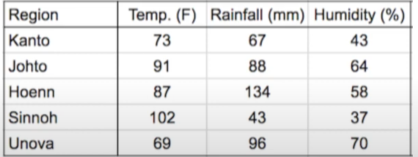

In [4]:
# yield = w1*temperature + w2*rainfall + w3*humidity
def crop_yield(region, weights):
  result = 0
  for x,w in zip(region, weights):
    result += x*w
  return result

In [5]:
crop_yield(kanto, weights)

56.8

In [6]:
crop_yield(hoenn, weights)

81.9

---

### **Python Lists & NumPy Arrays**

In [7]:
import numpy as np

In [8]:
kanto_np = np.array([73, 67, 43])
weights_np = np.array([w1,w2,w3])
kanto_np

array([73, 67, 43])

In [9]:
print(type(kanto_np))
print(type(weights_np))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
np.dot(kanto_np, weights_np) # this performs the dot product of two np_arrays

np.float64(56.8)

In [11]:
(kanto_np*weights_np).sum() # this first multiplies every corresponding element of 2 np_arrays and then sum them.

np.float64(56.8)

---
### **Benefits of NumPy Arrays**


In [12]:
# Python Lists
arr1 = list(range(1000000))
arr2 = list(range(1000000,2000000))

# NumPy Arrays
arr1_np = np.array(arr1)
arr2_np = np.array(arr2)

In [13]:
%%time
result = 0
for x1,x2 in zip(arr1,arr2):
  result = x1*x2
result

CPU times: total: 78.1 ms
Wall time: 132 ms


1999997000001

In [14]:
%%time
result=0
np.dot(arr1_np,arr2_np)
result

CPU times: total: 0 ns
Wall time: 0 ns


0

---
### **Multi-dimensional NumPy Arrays**

In [15]:
climate_data = np.array([[73, 67, 43],
                         [91, 88, 64],
                         [87, 134, 58],
                         [102, 43, 37],
                         [69, 96, 70]])
print(climate_data)
print("dimensions of climate_data array are:",climate_data.shape) # dimension of array
print("data type of climate_data array is",climate_data.dtype)
weights_np.dtype

[[ 73  67  43]
 [ 91  88  64]
 [ 87 134  58]
 [102  43  37]
 [ 69  96  70]]
dimensions of climate_data array are: (5, 3)
data type of climate_data array is int64


dtype('float64')

In [16]:
result_np = np.matmul(climate_data,weights_np)
# result = (result_np).sum()
print(result_np)

[56.8 76.9 81.9 57.7 74.9]


In [17]:
climate_data @ weights_np # shortcut for matrix multiplication

array([56.8, 76.9, 81.9, 57.7, 74.9])

---
### **Working with CSV Data Files**

CSVs: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields. 

In [18]:
import urllib.request
urllib.request.urlretrieve(
    'https://gist.githubusercontent.com/BirajCoder/a4ffcb76fd6fb221d76ac2ee2b8584e9/raw/4054f90adfd361b7aa4255e99c2e874664094cea/climate.csv',
    'climate.txt'
)

('climate.txt', <http.client.HTTPMessage at 0x190cfe31790>)

In [19]:
climate_data = np.genfromtxt('climate.txt', delimiter=',',skip_header=1)
# 'delimiter' is the type of character by which the data is seperated
# 'skip_header' is the number of rows in data to be skipped or not to be considered
print(climate_data)

[[25. 76. 99.]
 [39. 65. 70.]
 [59. 45. 77.]
 ...
 [99. 62. 58.]
 [70. 71. 91.]
 [92. 39. 76.]]


In [20]:
climate_data.shape # 10000 data rows with 3 columns

(10000, 3)

In [23]:
yields = climate_data @ weights_np
print(yields)
print(yields.shape) 

[72.2 59.7 65.2 ... 71.1 80.7 73.4]
(10000,)


In [25]:
climate_result = np.concatenate((climate_data, yields.reshape(10000,1)), axis=1)
print(climate_result)

[[25.  76.  99.  72.2]
 [39.  65.  70.  59.7]
 [59.  45.  77.  65.2]
 ...
 [99.  62.  58.  71.1]
 [70.  71.  91.  80.7]
 [92.  39.  76.  73.4]]


-> The axis argument specifies the dimension for concatenation.  axis=1 means we want to add extra columns and not extra rows to the data.

-> We use the np.reshape function to change the shape of yields from (10000,) to (10000,1).
